In [ ]:
import geopy.distance
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sn
import numpy as np
import xarray as xr
import json
import cartopy
from datetime import datetime
#from adjustText import adjust_text
import pandas as pd
import matplotlib.dates as mdates

In [2]:
data= xr.open_dataset('ipns://latest.orcestra-campaign.org/products/METEOR/DShip.zarr',engine='zarr')
#tsg = xr.open_dataset('../../data/M203_surf_oce.nc')
#tsg

In [3]:
DSHIP = xr.open_dataset('../../data/meteor_meteo_dship_20240923.nc')

In [3]:
DSHIP

<xarray.Dataset> Size: 20MB
Dimensions:           (time: 58980)
Coordinates:
  * time              (time) datetime64[ns] 472kB 2024-08-14 ... 2024-09-23T2...
    lat               (time) float64 472kB ...
    lon               (time) float64 472kB ...
Data variables: (12/39)
    sst_port          (time) float64 472kB ...
    sst_extern_port   (time) float64 472kB ...
    sst_intern_port   (time) float64 472kB ...
    sst_board         (time) float64 472kB ...
    sst_extern_board  (time) float64 472kB ...
    sst_intern_board  (time) float64 472kB ...
    ...                ...
    ship_heave        (time) float64 472kB ...
    ship_heave_std    (time) float64 472kB ...
    ship_pitch        (time) float64 472kB ...
    ship_pitch_std    (time) float64 472kB ...
    ship_roll         (time) float64 472kB ...
    ship_roll_std     (time) float64 472kB ...

In [4]:
#Ship track info
shipLat = DSHIP.lat
shipLon = DSHIP.lon
shipTrackTime = DSHIP.time
shipHeading = DSHIP.ship_heading

wspd = DSHIP.wspd

#DSHIP.close()

(-25.2, -24.8)

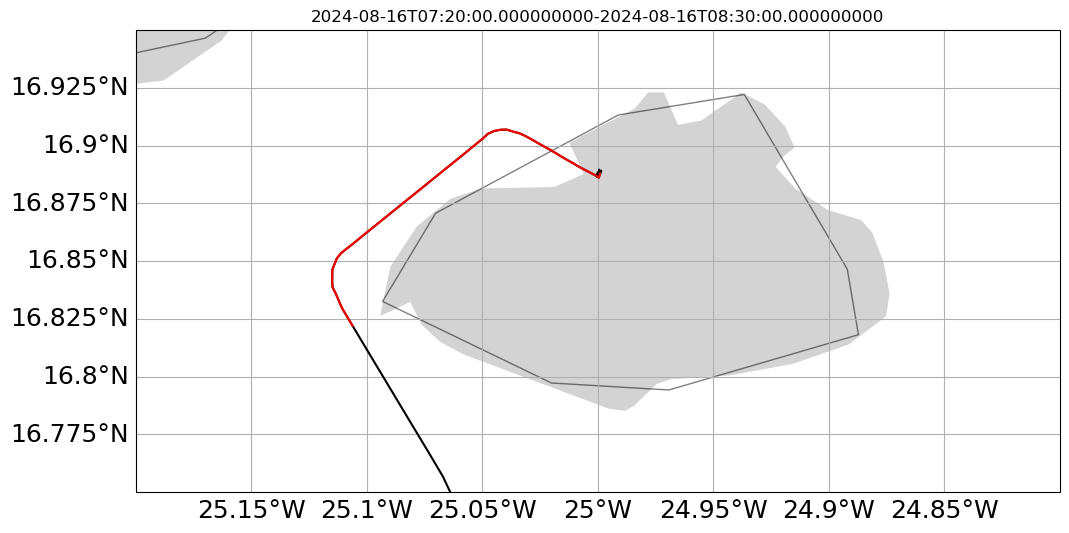

In [31]:
target_time = np.datetime64('2024-08-16T07:20:00')
i1 = np.where(shipTrackTime==target_time)[0]
i1=int(i1[0])

target_time2 = np.datetime64('2024-08-16T08:30:00')
i2 = np.where(shipTrackTime==target_time2)[0]
i2=int(i2[0])


plt.figure(figsize = (18, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution = '50m',alpha=0.5)
ax.add_feature(cartopy.feature.LAND,facecolor="lightgray") #land color
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18}
gl.ylabel_style = {'size': 18}

plt.plot(shipLon, shipLat, 'k')
plt.plot(shipLon[i1:i2], shipLat[i1:i2], 'r')
plt.title(str(shipTrackTime[i1].values)+'-'+str(shipTrackTime[i2].values))
ax.set_ylim(16.75,16.95)
ax.set_xlim(-25.2,-24.8)


Text(0, 0.5, 'Latitude')

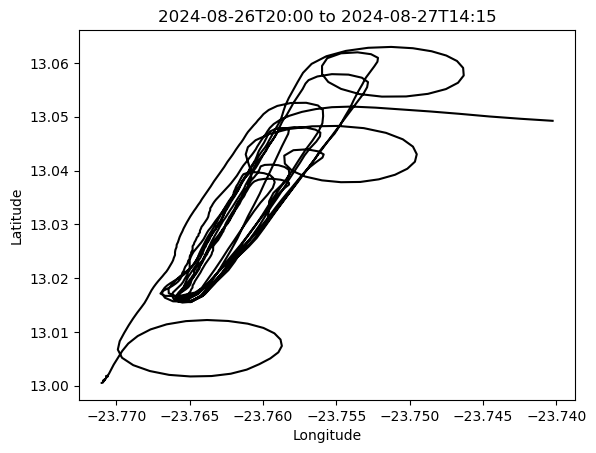

In [5]:
target_time = np.datetime64('2024-08-26T20:00:00')
i1 = np.where(shipTrackTime==target_time)[0]
i1=int(i1[0])

target_time2 = np.datetime64('2024-08-27T14:15')
i2 = np.where(shipTrackTime==target_time2)[0]
i2=int(i2[0])

plt.plot(shipLon[i1:i2], shipLat[i1:i2], 'k')
plt.title('2024-08-26T20:00 to 2024-08-27T14:15')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

/var/folders/ym/zbw7d2hd013cdrqzhhl0z7580000gn/T/ipykernel_68735/1589438091.py:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


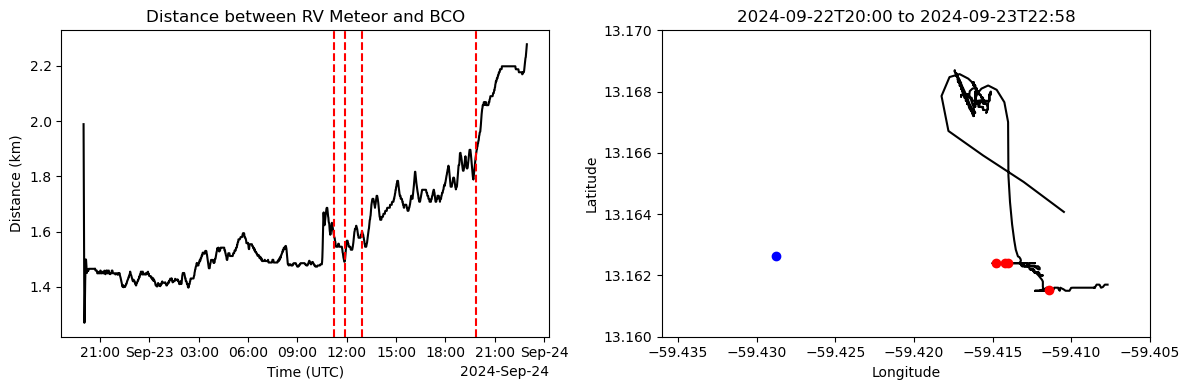

In [76]:
target_time = np.datetime64('2024-09-22T20:00:00')
i1 = np.where(shipTrackTime==target_time)[0]
i1=int(i1[0])

target_time2 = np.datetime64('2024-09-23T22:58')
i2 = np.where(shipTrackTime==target_time2)[0]
i2=int(i2[0])

HALO1 = np.datetime64('2024-09-23T11:15')
iHALO1 = np.where(shipTrackTime==HALO1)[0]
iHALO1=int(iHALO1[0])
HALO2 = np.datetime64('2024-09-23T11:55')
iHALO2 = np.where(shipTrackTime==HALO2)[0]
iHALO2=int(iHALO2[0])
HALO3 = np.datetime64('2024-09-23T12:56')
iHALO3 = np.where(shipTrackTime==HALO3)[0]
iHALO3=int(iHALO3[0])
HALO4 = np.datetime64('2024-09-23T19:52')
iHALO4 = np.where(shipTrackTime==HALO4)[0]
iHALO4=int(iHALO4[0])


coordinates = {'mindelo_lat': 16.88, 'mindelo_lon': -24.98, 
               'bco_lat': 13.162639, 'bco_lon': -59.42875,
               'praia_lat': 14.9198, 'praia_lon': -23.5073
              } 

# Calculate distance between ship and BCO
dist = np.zeros(len(shipLat[i1:i2+1]))+np.nan

count=0
for i in range(i1, i2):
    dist[count] = geopy.distance.distance((shipLat[i], shipLon[i]), (coordinates['bco_lat'], coordinates['bco_lon'])).km
    count+=1

fig, ax = plt.subplots(1,2,figsize=(12,4), layout="constrained")

ax[0].plot(shipTrackTime[i1:i2+1], dist, 'k')

ax[0].axvline(HALO1, color='red', linestyle='--')
ax[0].axvline(HALO2, color='red', linestyle='--')
ax[0].axvline(HALO3, color='red', linestyle='--')
ax[0].axvline(HALO4, color='red', linestyle='--')

ax[0].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[0].xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax[0].xaxis.get_major_locator()))
ax[0].set_title('Distance between RV Meteor and BCO')
ax[0].set_xlabel('Time (UTC)')
ax[0].set_ylabel('Distance (km)')

ax[1].plot(shipLon[i1:i2+1], shipLat[i1:i2+1], 'k')
ax[1].plot(coordinates['bco_lon'], coordinates['bco_lat'], 'bo')
ax[1].plot(shipLon[iHALO1], shipLat[iHALO1], 'ro')
ax[1].plot(shipLon[iHALO2], shipLat[iHALO2], 'ro')
ax[1].plot(shipLon[iHALO3], shipLat[iHALO3], 'ro')
ax[1].plot(shipLon[iHALO4], shipLat[iHALO4], 'ro')
ax[1].set_title('2024-09-22T20:00 to 2024-09-23T22:58')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlim(-59.436, -59.405)
ax[1].set_ylim(13.16, 13.17)

plt.tight_layout()
plt.show()

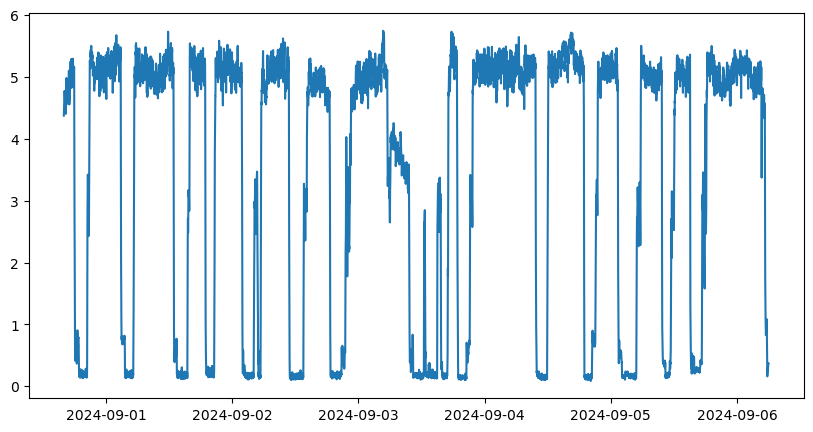

In [ ]:
# Find the index where shipTrackTime is 07:00 UTC on August 16
target_time = np.datetime64('2024-08-16T07:00:00')
index_start = np.where(shipTrackTime == target_time)[0]
index_start = int(index_start[0])

target_time = np.datetime64('2024-08-31T16:00:00')
i1= np.where(shipTrackTime == target_time)[0]
i1 = int(i1[0])

target_time = np.datetime64('2024-09-06T06:00:00')
i2= np.where(shipTrackTime == target_time)[0]
i2 = int(i2[0])

target_time = np.datetime64('2024-09-11T08:00:00')
i3= np.where(shipTrackTime == target_time)[0]
i3 = int(i3[0])

target_time = np.datetime64('2024-09-15T09:00:00')
i4= np.where(shipTrackTime == target_time)[0]
i4 = int(i4[0])

target_time = np.datetime64('2024-09-18T16:00:00')
i5= np.where(shipTrackTime == target_time)[0]
i5 = int(i5[0])

plt.figure(figsize=(10,5))
plt.plot(shipTrackTime[i1:i2], DSHIP.ship_speed[i1:i2])

Text(0.5, 1.0, 'Hourly Mean Sea Surface Temperature: Thermosalinograph')

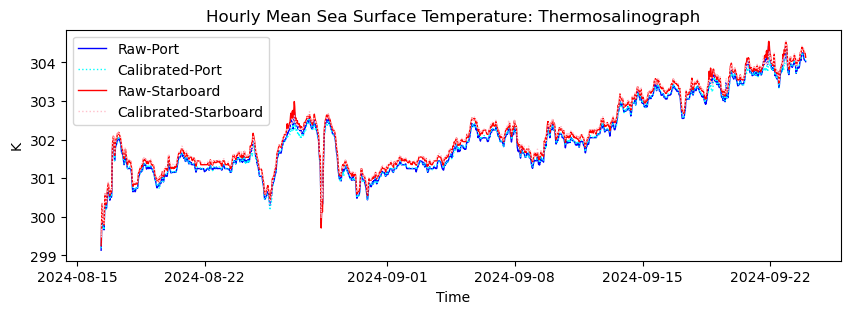

In [5]:
# Compared raw sst from TSG in DSHIP to calibrated TSG

# Find time indices for DSHIP and TSG
target_time = np.datetime64('2024-08-16T07:20:00')
i1_DSHIP = np.where(shipTrackTime == target_time)[0]
i1_DSHIP = int(i1_DSHIP[0])

i1_TSG = np.abs(tsg.TIME - target_time).argmin()
i1_TSG = int(i1_TSG)

target_time = np.datetime64('2024-09-23T22:59:00')
i2_DSHIP = np.where(shipTrackTime == target_time)[0]
i2_DSHIP = int(i2_DSHIP[0])

i2_TSG = np.abs(tsg.TIME - target_time).argmin()
i2_TSG = int(i2_TSG)

# Make Plot
fig, axs = plt.subplots(1, 1, figsize=(10,3))  # 7 rows, 1 column
nsmooth = 60 #60 for hourly running mean

axs.plot(shipTrackTime[i1_DSHIP:i2_DSHIP+1],DSHIP.sst_port[i1_DSHIP:i2_DSHIP+1].rolling(time=nsmooth,center=True).mean(),label="Raw-Port",color="blue",linewidth=1)
axs.plot(tsg.TIME[i1_TSG:i2_TSG+1],tsg.TEMP[i1_TSG:i2_TSG+1,0].rolling(TIME=nsmooth,center=True).mean()+273.15,label="Calibrated-Port",linestyle=":",color="cyan",linewidth=1)
axs.plot(shipTrackTime[i1_DSHIP:i2_DSHIP+1],DSHIP.sst_board[i1_DSHIP:i2_DSHIP+1].rolling(time=nsmooth,center=True).mean(),label="Raw-Starboard",color="red",linewidth=1)
axs.plot(tsg.TIME[i1_TSG:i2_TSG+1],tsg.TEMP[i1_TSG:i2_TSG+1,1].rolling(TIME=nsmooth,center=True).mean()+273.15,label="Calibrated-Starboard",linestyle=":",color="pink",linewidth=1)

axs.legend()
axs.set_xlabel("Time")
axs.set_ylabel("K")
axs.set_title("Hourly Mean Sea Surface Temperature: Thermosalinograph")

(298.0, 305.0)

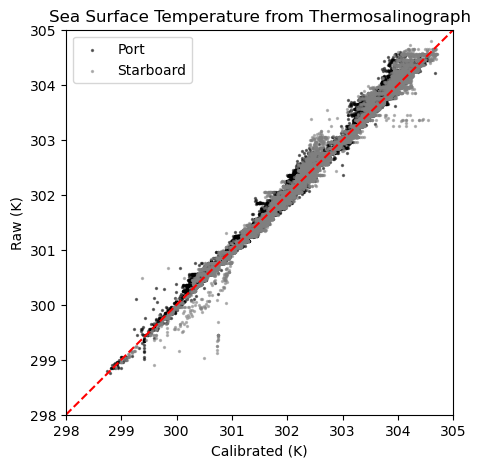

In [6]:
#Plot raw TSG against calibrated TSG
fig,ax = plt.subplots(figsize=(5,5))

ax.scatter(tsg.TEMP[i1_TSG:i2_TSG+1,0]+273.15,DSHIP.sst_port[i1_DSHIP:i2_DSHIP+1],marker='o',s=2,alpha=0.5,color='black',label='Port')
ax.scatter(tsg.TEMP[i1_TSG:i2_TSG+1,1]+273.15,DSHIP.sst_board[i1_DSHIP:i2_DSHIP+1],marker='o',s=2,alpha=0.5,color='gray',label='Starboard')
ax.plot([298,305],[298,305],'r--')

ax.legend()
ax.set_xlabel('Calibrated (K)')
ax.set_ylabel('Raw (K)')
ax.set_title('Sea Surface Temperature from Thermosalinograph')

ax.set_xlim(298,305)
ax.set_ylim(298,305)

In [ ]:
# Smooth wspd with a running mean
wspd_smoothed = wspd[index_start:len(shipTrackTime)].rolling(time=60, center=True).mean() # 60 minute running mean

In [7]:
#Define low wind speed events based on wind speed < 3 m/s for 6 hours
wspd_threshold = 3
duration_threshold = 6*60 #indices in 6 hours [each index is 1 minute]

#Find indices where wspd < wspd_threshold
ilowwind = wspd_smoothed < wspd_threshold

#Identify continous time periods of low wind for at least 360 minutes
idoldrum = []
for i in range(len(wspd_smoothed)-duration_threshold+1):
    if np.all(ilowwind[i:i+duration_threshold]):
        idoldrum.append(i)

print("Starting indices for 6 continuous hours where wspd < 3:", idoldrum)

Starting indices for 6 continuous hours where wspd < 3: [10881, 10882, 10883, 10884, 10885, 10886, 10887, 10888, 10889, 10890, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10898, 10899, 10900, 10901, 10902, 10903, 10904, 10905, 10906, 10907, 10908, 10909, 10910, 10911, 10912, 10913, 10914, 10915, 10916, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10924, 10925, 10926, 10927, 10928, 10929, 10930, 10931, 10932, 10933, 10934, 10935, 10936, 10937, 10938, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946, 10947, 10948, 10949, 10950, 10951, 10952, 10953, 10954, 10955, 10956, 10957, 10958, 10959, 10960, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10968, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 10977, 10978, 10979, 10980, 10981, 10982, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 10990, 10991, 10992, 10993, 10994, 10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015

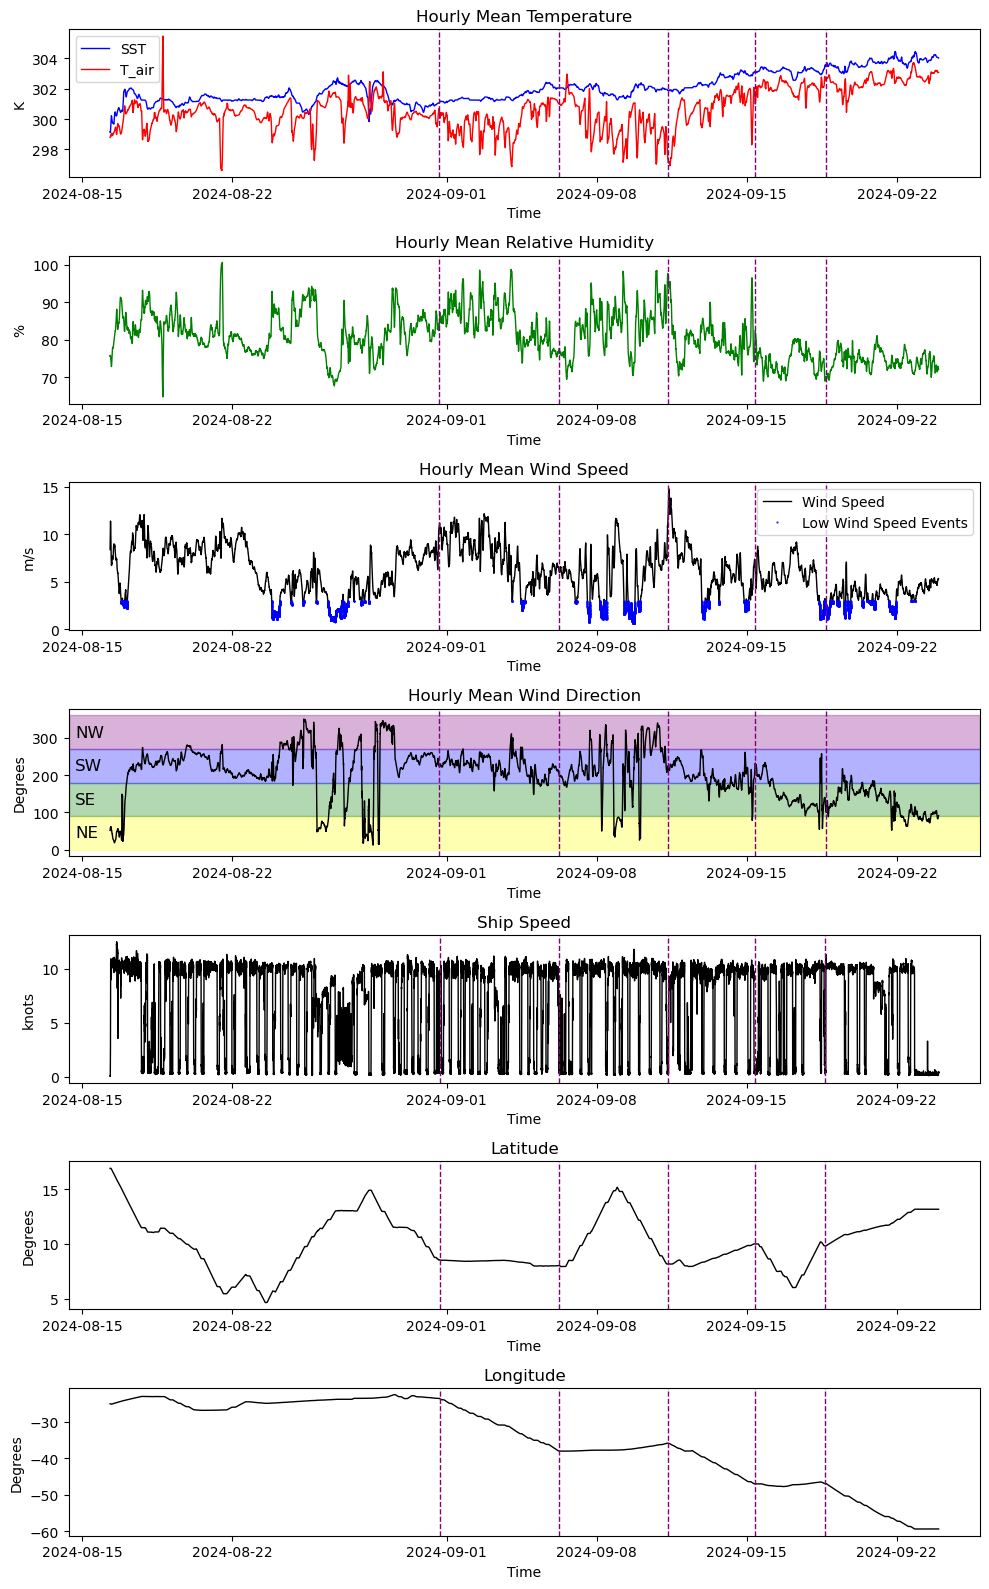

In [9]:
fig, axs = plt.subplots(7, 1, figsize=(10, 16))  # 7 rows, 1 column
nsmooth = 60 #60 for hourly running mean

axs[0].plot(shipTrackTime[index_start:len(shipTrackTime)],DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="SST",color="blue",linewidth=1)
axs[0].plot(shipTrackTime[index_start:len(shipTrackTime)],DSHIP.t_air_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="T_air",color="red",linewidth=1)
axs[0].legend()
axs[0].set_xlabel("Time")
axs[0].set_ylabel("K")
axs[0].set_title("Hourly Mean Temperature")

axs[1].plot(shipTrackTime[index_start:len(shipTrackTime)],DSHIP.rh_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="RH",color="green",linewidth=1)
axs[1].set_xlabel("Time")
axs[1].set_ylabel("%")
axs[1].set_title("Hourly Mean Relative Humidity")

axs[2].plot(shipTrackTime[index_start:len(shipTrackTime)],wspd[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Speed",color="black",linewidth=1)
axs[2].plot(shipTrackTime[index_start:len(shipTrackTime)][ilowwind],wspd_smoothed[ilowwind],'bo',label="Low Wind Speed Events",markersize=0.5)
axs[2].legend()
axs[2].set_xlabel("Time")
axs[2].set_ylabel("m/s")
axs[2].set_title("Hourly Mean Wind Speed")

axs[3].plot(shipTrackTime[index_start:len(shipTrackTime)],DSHIP.wdir[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Direction",color="black",linewidth=1)
axs[3].set_xlabel("Time")
axs[3].set_title("Hourly Mean Wind Direction")
axs[3].set_ylabel("Degrees")

# Apply shading for the specified wind direction range
axs[3].axhspan(0, 90, color='yellow', alpha=0.3)
axs[3].text(shipTrackTime[1000], (0 + 90) / 2, 'NE', color='black', fontsize=12, verticalalignment='center')
axs[3].axhspan(90, 180, color='green', alpha=0.3)
axs[3].text(shipTrackTime[1000], (90 + 180) / 2, 'SE', color='black', fontsize=12, verticalalignment='center')
axs[3].axhspan(180, 270, color='blue', alpha=0.3)
axs[3].text(shipTrackTime[1000], (180 + 270) / 2, 'SW', color='black', fontsize=12, verticalalignment='center')
axs[3].axhspan(270, 360, color='purple', alpha=0.3)
axs[3].text(shipTrackTime[1000], (270 + 360) / 2, 'NW', color='black', fontsize=12, verticalalignment='center')

axs[4].plot(shipTrackTime[index_start:len(shipTrackTime)],DSHIP.ship_speed[index_start:len(shipTrackTime)]*1.94384,label="Ship Speed",color="black",linewidth=1)
axs[4].set_xlabel("Time")
axs[4].set_title("Ship Speed")
axs[4].set_ylabel("knots")

axs[5].plot(shipTrackTime[index_start:len(shipTrackTime)],shipLat[index_start:len(shipTrackTime)],label="Latitude",color="black",linewidth=1)
axs[5].set_xlabel("Time")
axs[5].set_title("Latitude")
axs[5].set_ylabel("Degrees")    

axs[6].plot(shipTrackTime[index_start:len(shipTrackTime)],shipLon[index_start:len(shipTrackTime)],label="Longitude",color="black",linewidth=1)
axs[6].set_xlabel("Time")
axs[6].set_title("Longitude")  
axs[6].set_ylabel("Degrees")

# Convert shipTrackTime to datetime if it's not already
shipTrackTime = pd.to_datetime(shipTrackTime)

# Add vertical lines at the specified indices
indices = [i1, i2, i3, i4, i5]
for idx in indices:
    for ax in axs:
        ax.axvline(shipTrackTime[idx], color='purple', linestyle='--', linewidth=1)


plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


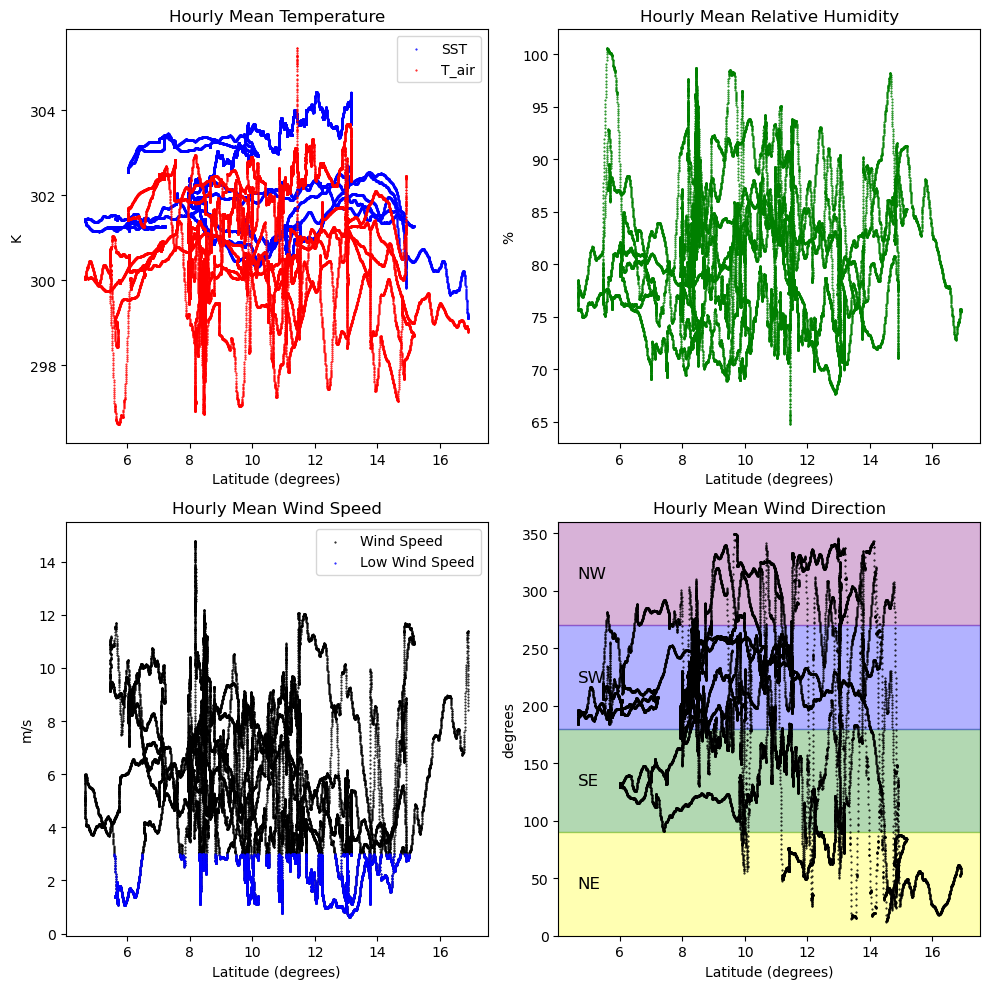

In [11]:
#scatter plot of stuff against latitude
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(shipLat[index_start:len(shipTrackTime)],DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="SST",color='b',marker='.',s=1)
axs[0,0].scatter(shipLat[index_start:len(shipTrackTime)],DSHIP.t_air_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="T_air",color='r',marker='.',s=1)
axs[0,0].legend()
axs[0,0].set_xlabel("Latitude (degrees)")
axs[0,0].set_ylabel("K")
axs[0,0].set_title("Hourly Mean Temperature")

axs[0,1].scatter(shipLat[index_start:len(shipTrackTime)],DSHIP.rh_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="RH",color='g',marker='.',s=1)
axs[0,1].set_xlabel("Latitude (degrees)")
axs[0,1].set_ylabel("%")
axs[0,1].set_title("Hourly Mean Relative Humidity")

axs[1,0].scatter(shipLat[index_start:len(shipTrackTime)],wspd[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Speed",color='k',marker='.',s=1)
axs[1,0].scatter(shipLat[index_start:len(shipTrackTime)][ilowwind],wspd_smoothed[ilowwind],label="Low Wind Speed",color='b',marker='.',s=1)
axs[1,0].legend()
axs[1,0].set_xlabel("Latitude (degrees)")
axs[1,0].set_ylabel("m/s")
axs[1,0].set_title("Hourly Mean Wind Speed")

# Apply shading for the specified wind direction range
ilat= np.where(shipLat== np.min(shipLat))[0]

axs[1,1].axhspan(0, 90, color='yellow', alpha=0.3)
axs[1,1].text(shipLat[ilat], (0 + 90) / 2, 'NE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(90, 180, color='green', alpha=0.3)
axs[1,1].text(shipLat[ilat], (90 + 180) / 2, 'SE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(180, 270, color='blue', alpha=0.3)
axs[1,1].text(shipLat[ilat], (180 + 270) / 2, 'SW', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(270, 360, color='purple', alpha=0.3)
axs[1,1].text(shipLat[ilat], (270 + 360) / 2, 'NW', color='black', fontsize=12, verticalalignment='center')

axs[1,1].scatter(shipLat[index_start:len(shipTrackTime)],DSHIP.wdir[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Direction",color='k',marker='.',s=1)
axs[1,1].set_xlabel("Latitude (degrees)")
axs[1,1].set_ylabel("degrees")
axs[1,1].set_title("Hourly Mean Wind Direction")
axs[1,1].set_ylim(0, 360)

plt.tight_layout()  # Adjust subplots to fit into figure area.


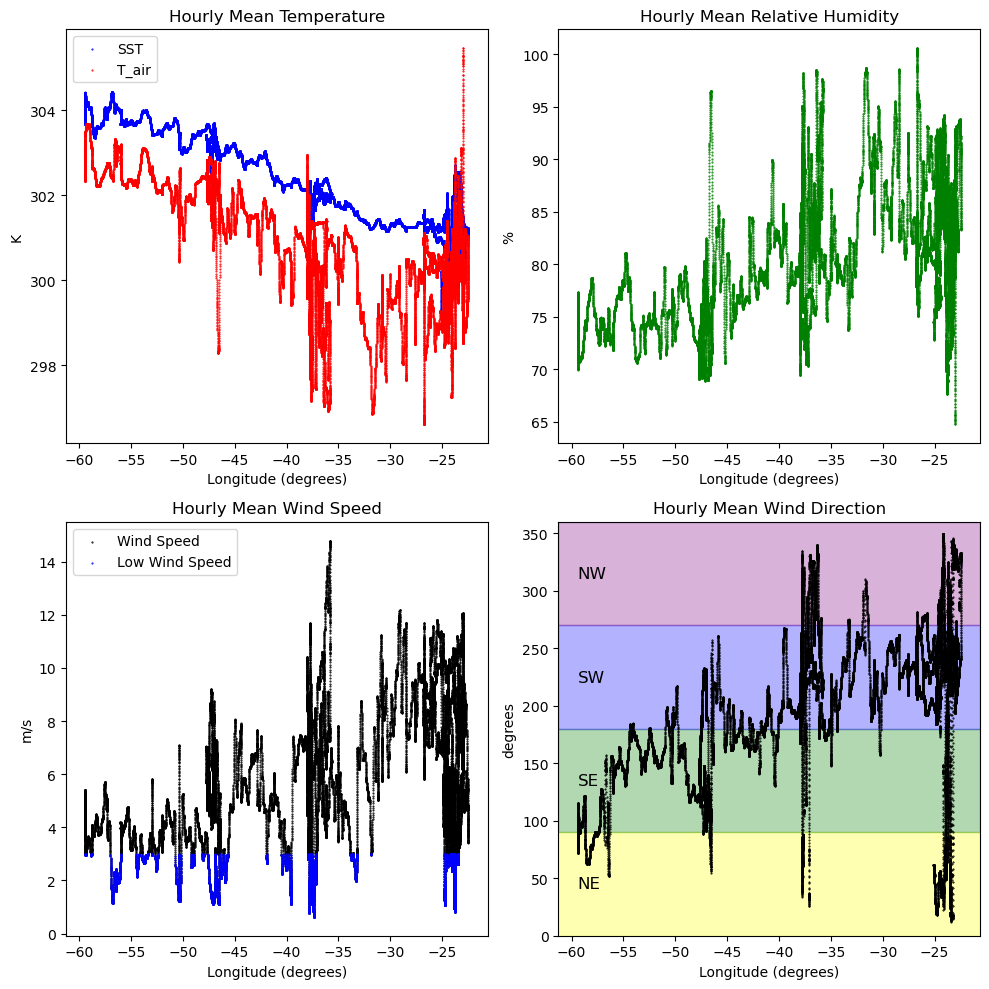

In [12]:
#scatter plot of stuff against longitude
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(shipLon[index_start:len(shipTrackTime)],DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="SST",color='b',marker='.',s=1)
axs[0,0].scatter(shipLon[index_start:len(shipTrackTime)],DSHIP.t_air_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="T_air",color='r',marker='.',s=1)
axs[0,0].legend()
axs[0,0].set_xlabel("Longitude (degrees)")
axs[0,0].set_ylabel("K")
axs[0,0].set_title("Hourly Mean Temperature")

axs[0,1].scatter(shipLon[index_start:len(shipTrackTime)],DSHIP.rh_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="RH",color='g',marker='.',s=1)
axs[0,1].set_xlabel("Longitude (degrees)")
axs[0,1].set_ylabel("%")
axs[0,1].set_title("Hourly Mean Relative Humidity")

axs[1,0].scatter(shipLon[index_start:len(shipTrackTime)],wspd[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Speed",color='k',marker='.',s=1)
axs[1,0].scatter(shipLon[index_start:len(shipTrackTime)][ilowwind],wspd_smoothed[ilowwind],label="Low Wind Speed",color='b',marker='.',s=1)
axs[1,0].legend()
axs[1,0].set_xlabel("Longitude (degrees)")
axs[1,0].set_ylabel("m/s")
axs[1,0].set_title("Hourly Mean Wind Speed")

# Apply shading for the specified wind direction range
ilon= np.where(shipLon== np.min(shipLon))[0]

axs[1,1].axhspan(0, 90, color='yellow', alpha=0.3)
axs[1,1].text(shipLon[ilon], (0 + 90) / 2, 'NE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(90, 180, color='green', alpha=0.3)
axs[1,1].text(shipLon[ilon], (90 + 180) / 2, 'SE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(180, 270, color='blue', alpha=0.3)
axs[1,1].text(shipLon[ilon], (180 + 270) / 2, 'SW', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(270, 360, color='purple', alpha=0.3)
axs[1,1].text(shipLon[ilon], (270 + 360) / 2, 'NW', color='black', fontsize=12, verticalalignment='center')

axs[1,1].scatter(shipLon[index_start:len(shipTrackTime)],DSHIP.wdir[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Direction",color='k',marker='.',s=1)
axs[1,1].set_xlabel("Longitude (degrees)")
axs[1,1].set_ylabel("degrees")
axs[1,1].set_title("Hourly Mean Wind Direction")
axs[1,1].set_ylim(0, 360)

plt.tight_layout()  # Adjust subplots to fit into figure area.

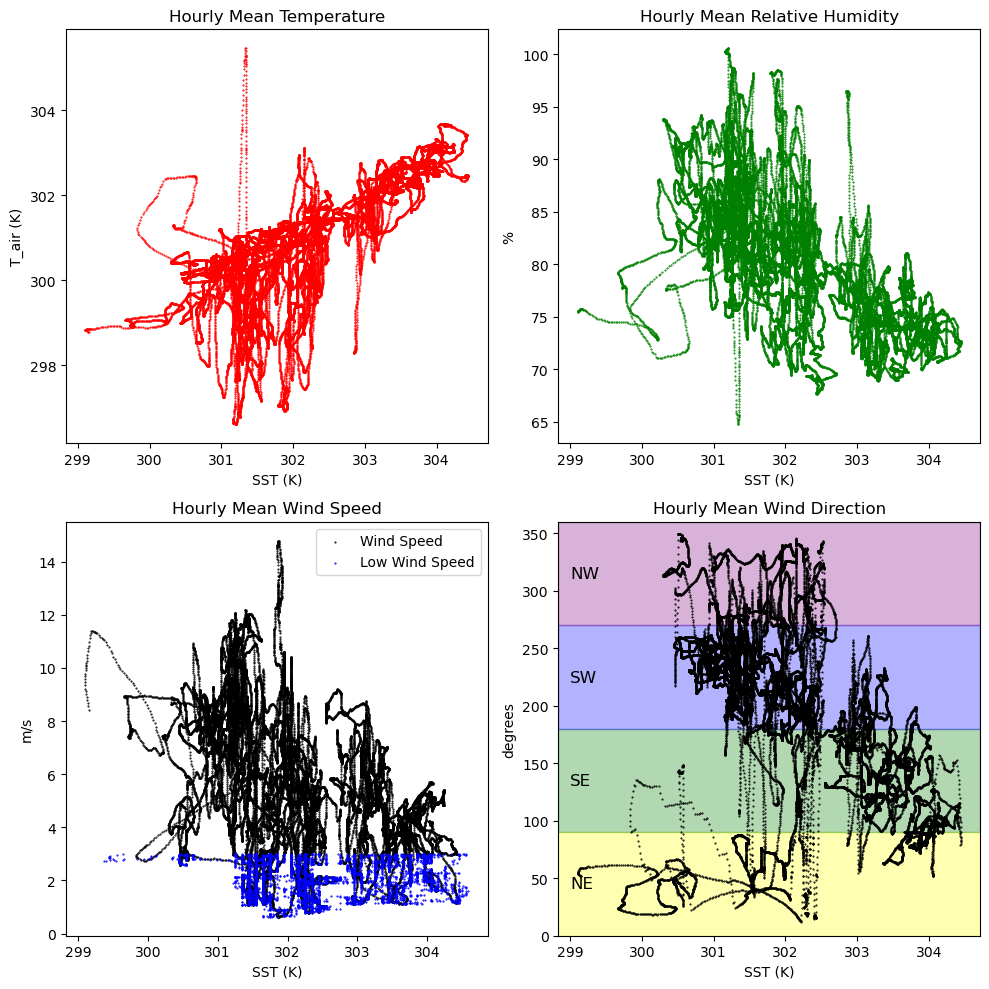

In [13]:
#scatter plot of stuff against SST
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),DSHIP.t_air_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="T_air",color='r',marker='.',s=1)
axs[0,0].set_xlabel("SST (K)")
axs[0,0].set_ylabel("T_air (K)")
axs[0,0].set_title("Hourly Mean Temperature")

axs[0,1].scatter(DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),DSHIP.rh_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="RH",color='g',marker='.',s=1)
axs[0,1].set_xlabel("SST (K)")
axs[0,1].set_ylabel("%")
axs[0,1].set_title("Hourly Mean Relative Humidity")

axs[1,0].scatter(DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),wspd[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Speed",color='k',marker='.',s=1)
axs[1,0].scatter(DSHIP.sst_port[index_start:len(shipTrackTime)][ilowwind],wspd_smoothed[ilowwind],label="Low Wind Speed",color='b',marker='.',s=1)
axs[1,0].legend()
axs[1,0].set_xlabel("SST (K)")
axs[1,0].set_ylabel("m/s")
axs[1,0].set_title("Hourly Mean Wind Speed")

# Apply shading for the specified wind direction range
axs[1,1].axhspan(0, 90, color='yellow', alpha=0.3)
axs[1,1].text(299, (0 + 90) / 2, 'NE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(90, 180, color='green', alpha=0.3)
axs[1,1].text(299, (90 + 180) / 2, 'SE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(180, 270, color='blue', alpha=0.3)
axs[1,1].text(299, (180 + 270) / 2, 'SW', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axhspan(270, 360, color='purple', alpha=0.3)
axs[1,1].text(299, (270 + 360) / 2, 'NW', color='black', fontsize=12, verticalalignment='center')

axs[1,1].scatter(DSHIP.sst_port[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),DSHIP.wdir[index_start:len(shipTrackTime)].rolling(time=nsmooth,center=True).mean(),label="Wind Direction",color='k',marker='.',s=1)
axs[1,1].set_xlabel("SST (K)")
axs[1,1].set_ylabel("degrees")
axs[1,1].set_title("Hourly Mean Wind Direction")
axs[1,1].set_ylim(0, 360)

plt.tight_layout()  # Adjust subplots to fit into figure area.

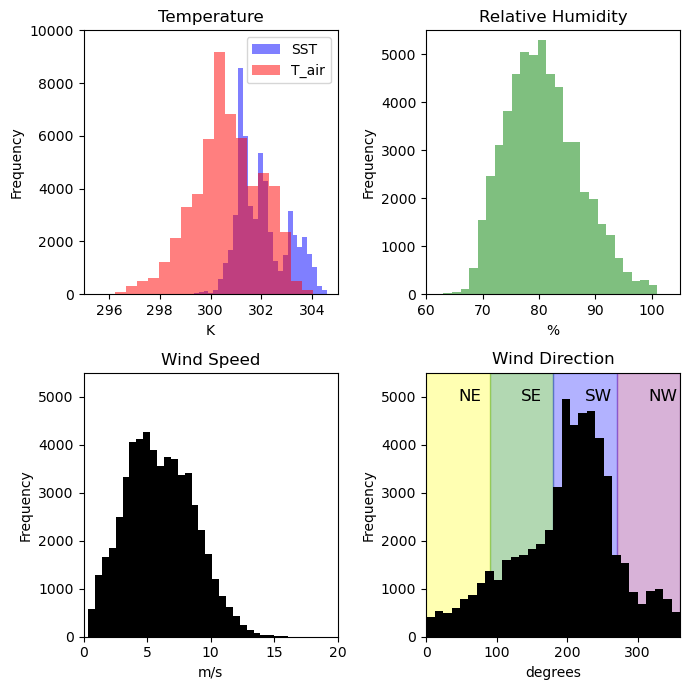

In [13]:
#Make a histogram of things
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

axs[0,0].hist(DSHIP.sst_port[index_start:len(shipTrackTime)],bins=30,color='b',alpha=0.5,label="SST")
axs[0,0].hist(DSHIP.t_air_port[index_start:len(shipTrackTime)],bins=30,color='r',alpha=0.5,label="T_air")
axs[0,0].legend()
axs[0,0].set_xlabel("K")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_title("Temperature")
axs[0,0].set_xlim(295, 305)
axs[0,0].set_ylim(0, 10000)

axs[0,1].hist(DSHIP.rh_port[index_start:len(shipTrackTime)],bins=30,color='g',alpha=0.5,label="RH")
axs[0,1].set_xlabel("%")
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_title("Relative Humidity")
axs[0,1].set_xlim(60, 105)
axs[0,1].set_ylim(0, 5500)

axs[1,0].hist(wspd[index_start:len(shipTrackTime)],bins=30,color='k',alpha=1,label="Wind Speed")
axs[1,0].set_xlabel("m/s")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_title("Wind Speed")
axs[1,0].set_xlim(0, 20)
axs[1,0].set_ylim(0, 5500)

# Apply shading for the specified wind direction range
axs[1,1].axvspan(0, 90, color='yellow', alpha=0.3)
axs[1,1].text((0 + 90) / 2, 5000,'NE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axvspan(90, 180, color='green', alpha=0.3)
axs[1,1].text((90 + 180) / 2,5000,'SE', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axvspan(180, 270, color='blue', alpha=0.3)
axs[1,1].text((180 + 270) / 2, 5000,'SW', color='black', fontsize=12, verticalalignment='center')
axs[1,1].axvspan(270, 360, color='purple', alpha=0.3)
axs[1,1].text((270 + 360) / 2, 5000,'NW', color='black', fontsize=12, verticalalignment='center')

axs[1,1].hist(DSHIP.wdir[index_start:len(shipTrackTime)],bins=30,color='k',alpha=1,label="Wind Direction")
axs[1,1].set_xlabel("degrees")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("Wind Direction")
axs[1,1].set_xlim(0, 360)
axs[1,1].set_ylim(0, 5500)

plt.tight_layout()  # Adjust subplots to fit into figure area.


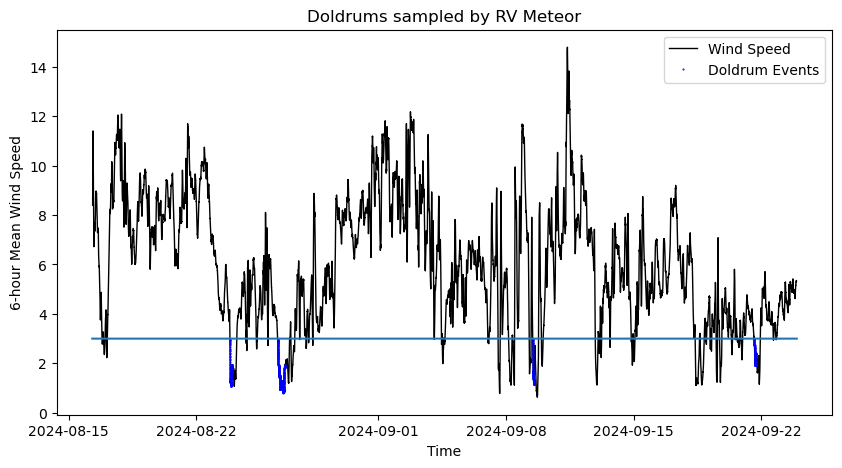

In [14]:
plt.figure(figsize=(10,5))
plt.plot(shipTrackTime[index_start:len(shipTrackTime)],wspd_smoothed,label="Wind Speed",color="black",linewidth=1)
plt.plot(shipTrackTime[index_start:len(shipTrackTime)][idoldrum],wspd_smoothed[idoldrum],'bo',label="Doldrum Events",markersize=0.5)
plt.plot(shipTrackTime[index_start:len(shipTrackTime)],3+np.zeros(len(shipTrackTime[index_start:len(shipTrackTime)])))

plt.xlabel("Time")
plt.ylabel("6-hour Mean Wind Speed")
plt.title("Doldrums sampled by RV Meteor")
plt.legend()
plt.show()

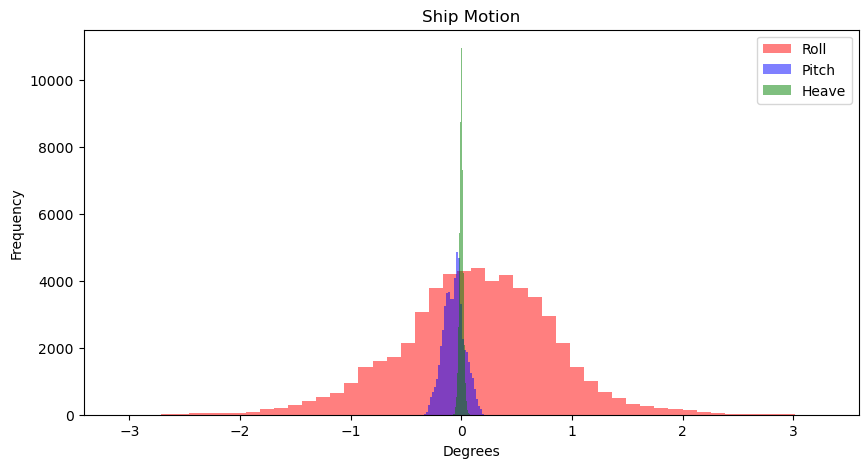

In [14]:
plt.figure(figsize=(10,5))
plt.hist(DSHIP.ship_roll[index_start:len(shipTrackTime)], bins=50, color='red', alpha=0.5, label="Roll")
plt.hist(DSHIP.ship_pitch[index_start:len(shipTrackTime)], bins=30, color='blue', alpha=0.5, label="Pitch")
plt.hist(DSHIP.ship_heave[index_start:len(shipTrackTime)], bins=30, color='green', alpha=0.5, label="Heave")
plt.xlabel("Degrees")
plt.ylabel("Frequency")
plt.legend()
plt.title("Ship Motion")

plt.show()